# Clustermap
It is a matrix plot with clustering of rows and columns. To make these clusters seaborn uses `Hierarchical Agglomerative Clustering` or `HAC`. It makes use of the distance (difference between the values).

### Importing libraries

In [1]:
#importing libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#setting style
sns.set_style('darkgrid')

### Creating a dataframe

In [2]:
#Creating a dictionary
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

#Creating a dataframe
toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

#Loading the data
toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


### Creating a clustermap

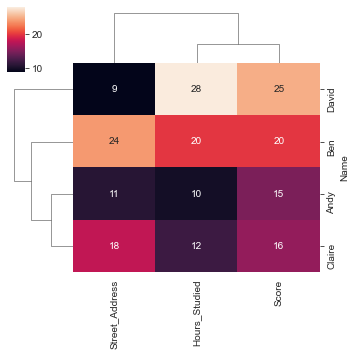

In [3]:
sns.clustermap(toy_data, figsize=(5,5), annot=True);
#figsize adjusts the figure
#annot for the values of the cell

### Clustering on advance data

In [4]:
#Loading the data
penguins=sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
penguins.shape

(344, 7)

In [6]:
penguins.dropna(axis=0, inplace=True)
penguins.shape

(333, 7)

### Building a clustermap

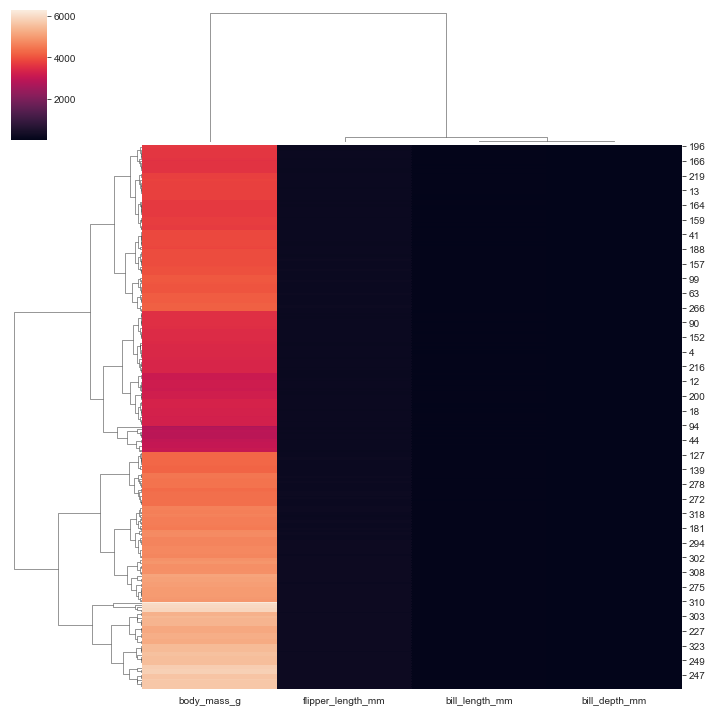

In [7]:
numerical_cols = penguins.columns[2:6]
sns.clustermap(penguins[numerical_cols]);
#but this looks chaotic and of least use

We need to scale our data then the scaled data will range from 0 to 1. Using `standard_scale`, We can scale rows or/and columns.

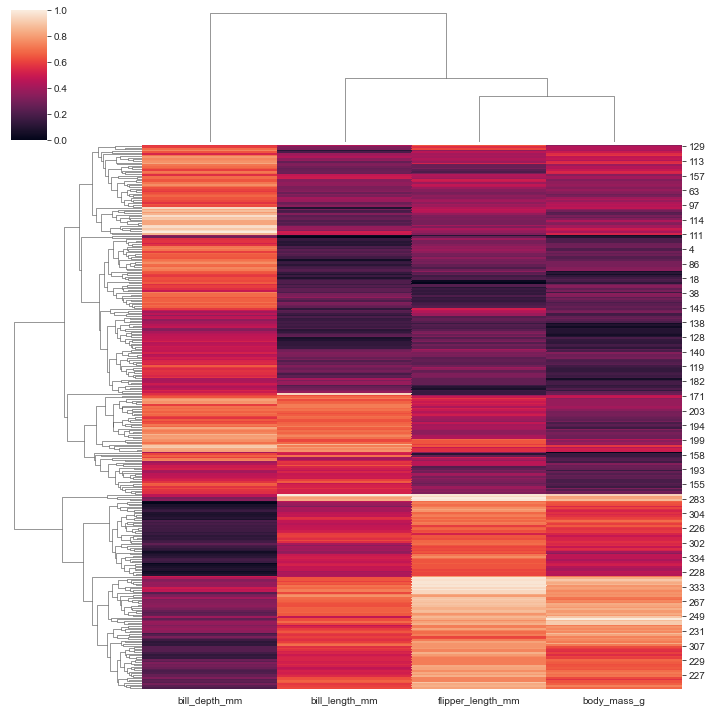

In [8]:
sns.clustermap(penguins[numerical_cols], standard_scale=1);
#1 for scaling columns
#0 for scaling rows

### Linkage and Metric
Linkage refers to the points considered for calculating the distance of a data point from the clusters and metric refers to the type of distance it could Eucludiean, Manhattann or Cosine.

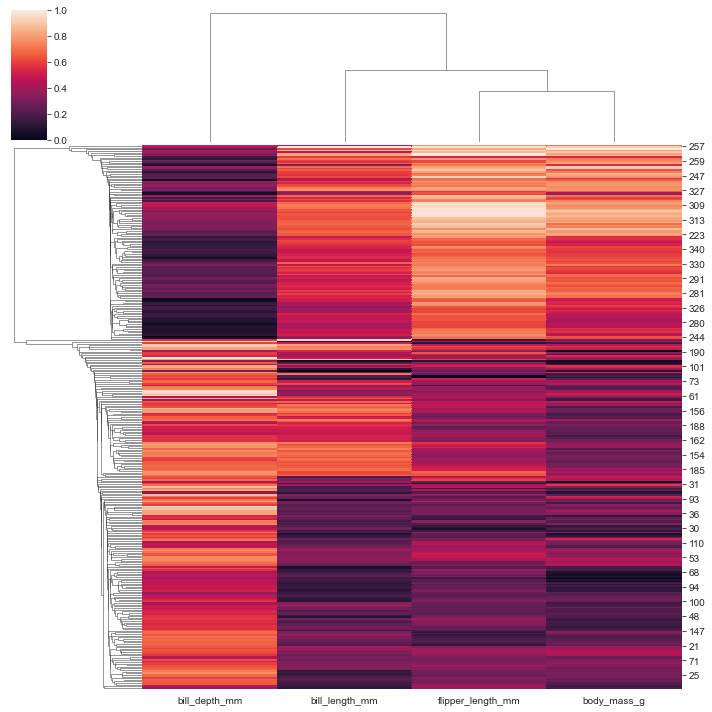

In [9]:
#Changing the linkage to simple linkage
sns.clustermap(penguins[numerical_cols], standard_scale=1, method='single');
#the clusters got longer

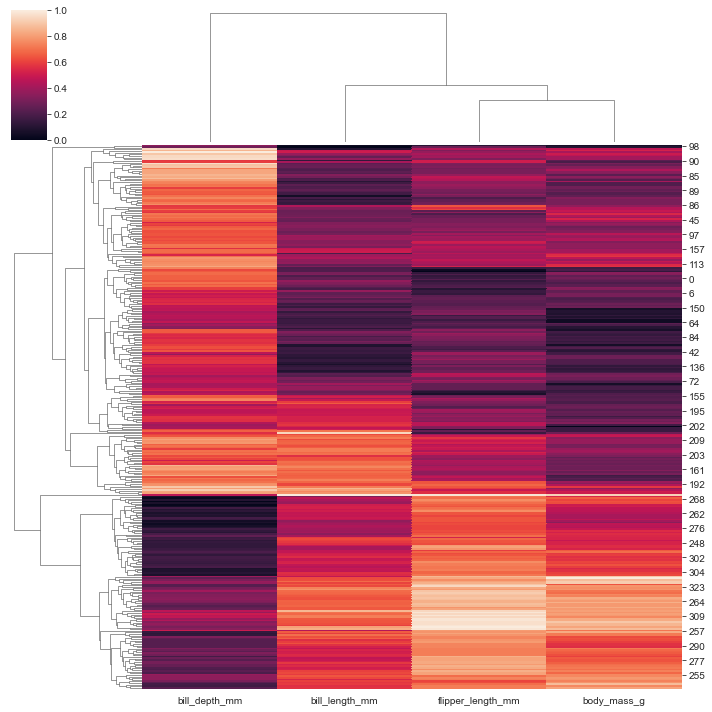

In [10]:
#changing the metric to manhattan distance aka cityblock
sns.clustermap(penguins[numerical_cols], standard_scale=1, metric='cityblock');

### Additional options

**Row colors**

In [11]:
species_colors=penguins.species.map({
    'Adelie': 'blue',
    'Chinstrap': 'red',
    'Gentoo': 'green'
})

In [12]:
len(species_colors)

333

In [13]:
species_colors[:5]

0    blue
1    blue
2    blue
4    blue
5    blue
Name: species, dtype: object

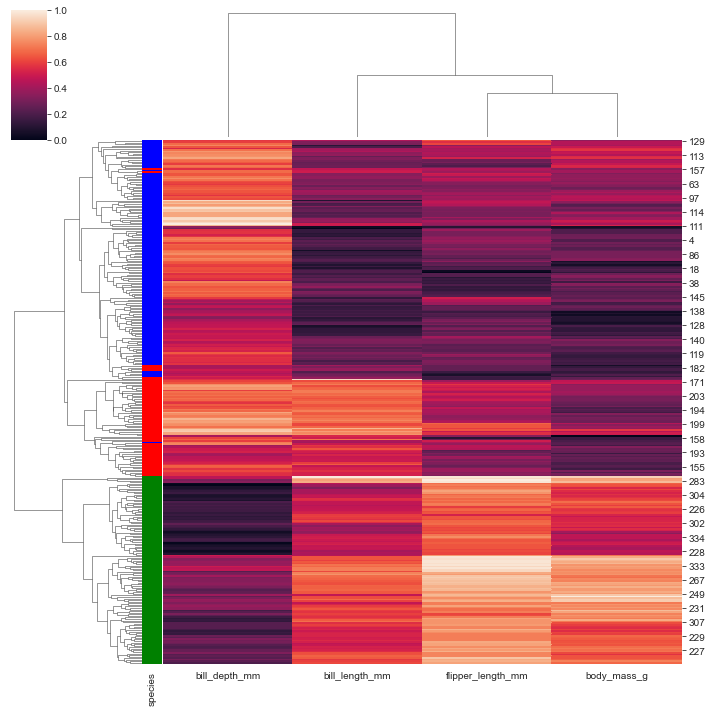

In [14]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, row_colors=species_colors)
#gives color to the specific species

The End.